<font color='aqua'>
Set GPU

In [24]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Found GPU at: /device:GPU:0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17657469051602650831, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16500099736618558416
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 18069991020569499451
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 476406902350244505
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

<font color='aqua'>
Upload and repair data

In [25]:
from google.colab import drive

In [26]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cp 'drive/My Drive/FruitClassification/Training.zip' '/content/Training.zip'

In [ ]:
!unzip Training.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/Plum/209_100.jpg  
  inflating: Training/Plum/20_100.jpg  
  inflating: Training/Plum/210_100.jpg  
  inflating: Training/Plum/211_100.jpg  
  inflating: Training/Plum/212_100.jpg  
  inflating: Training/Plum/213_100.jpg  
  inflating: Training/Plum/214_100.jpg  
  inflating: Training/Plum/215_100.jpg  
  inflating: Training/Plum/216_100.jpg  
  inflating: Training/Plum/217_100.jpg  
  inflating: Training/Plum/218_100.jpg  
  inflating: Training/Plum/219_100.jpg  
  inflating: Training/Plum/21_100.jpg  
  inflating: Training/Plum/220_100.jpg  
  inflating: Training/Plum/221_100.jpg  
  inflating: Training/Plum/222_100.jpg  
  inflating: Training/Plum/223_100.jpg  
  inflating: Training/Plum/224_100.jpg  
  inflating: Training/Plum/225_100.jpg  
  inflating: Training/Plum/226_100.jpg  
  inflating: Training/Plum/227_100.jpg  
  inflating: Training/Plum/228_100.jpg  
  inflating: Training/Plum/229_100.jpg  
  inflat

<font color='aqua'>
Process data

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [ ]:
TRAINING_DIR = 'Training/'
CLASSES = os.listdir(TRAINING_DIR)

In [ ]:
print('Numbers of classes: ', len(CLASSES))
print(CLASSES)

Numbers of classes:  71
['Granadilla', 'Salak', 'Apple Red 2', 'Strawberry Wedge', 'Tangelo', 'Banana', 'Tamarillo', 'Apple Golden 1', 'Passion Fruit', 'Cantaloupe 2', 'Pitahaya Red', 'Physalis', 'Grape Pink', 'Mango', 'Papaya', 'Apple Red Yellow', 'Apple Granny Smith', 'Maracuja', 'Huckleberry', 'Apricot', 'Pomegranate', 'Kiwi', 'Grape White 2', 'Avocado ripe', 'Melon Piel de Sapo', 'Carambula', 'Apple Red Delicious', 'Apple Golden 3', 'Mulberry', 'Apple Braeburn', 'Banana Red', 'Grapefruit Pink', 'Lychee', 'Cherry Rainier', 'Limes', 'Raspberry', 'Strawberry', 'Cantaloupe 1', 'Pear', 'Lemon Meyer', 'Pear Abate', 'Nectarine', 'Apple Golden 2', 'Dates', 'Pear Williams', 'Rambutan', 'Pineapple Mini', 'Physalis with Husk', 'Mandarine', 'Kaki', 'Apple Red 3', 'Avocado', 'Cocos', 'Pineapple', 'Cactus fruit', 'Pepino', 'Cherry 1', 'Quince', 'Lemon', 'Peach Flat', 'Orange', 'Cherry 2', 'Grape White', 'Apple Red 1', 'Kumquats', 'Grapefruit White', 'Clementine', 'Guava', 'Pear Monster', 'Plum',

In [ ]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    class_num = 0

    for category in CLASSES:
      path = os.path.join(TRAINING_DIR, category)
      
      for img in tqdm(os.listdir(path)):
        try:
          img_array = cv2.imread(os.path.join(path, img))
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Resize to 64x64x3
          training_data.append([new_array, class_num])
        except Exception as e:
          pass
      class_num += 1

    return training_data

In [ ]:
training_data = create_training_data()

100%|██████████| 492/492 [00:00<00:00, 3831.15it/s]


In [ ]:
import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample[1])

35625
22
20
67
25
48


In [ ]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
y = np.array(y)
print('Input shape = ', X.shape[1:])


Input shape =  (64, 64, 3)


<font color='aqua'>
Build model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=16, kernel_size = (5,5), activation = 'relu', input_shape=X.shape[1:],
                 padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=len(CLASSES), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         2

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', # lr=0.001
              metrics=['accuracy'],
              )

<font color='aqua'>
Train and save model

In [ ]:
history = model.fit(X, y, batch_size=32, epochs=50, validation_split=0.25)

Epoch 1/50
835/835 [==============================] - 6s 7ms/step - loss: 1.0032 - accuracy: 0.7192 - val_loss: 0.0772 - val_accuracy: 0.9742
Epoch 2/50
835/835 [==============================] - 6s 7ms/step - loss: 0.1085 - accuracy: 0.9643 - val_loss: 0.0255 - val_accuracy: 0.9918
Epoch 3/50
835/835 [==============================] - 6s 7ms/step - loss: 0.0619 - accuracy: 0.9808 - val_loss: 0.0621 - val_accuracy: 0.9780
Epoch 4/50
835/835 [==============================] - 6s 7ms/step - loss: 0.0655 - accuracy: 0.9779 - val_loss: 0.1885 - val_accuracy: 0.9376
Epoch 5/50
835/835 [==============================] - 6s 7ms/step - loss: 0.0327 - accuracy: 0.9869 - val_loss: 0.0139 - val_accuracy: 0.9921
Epoch 6/50
835/835 [==============================] - 6s 7ms/step - loss: 0.0718 - accuracy: 0.9773 - val_loss: 0.0309 - val_accuracy: 0.9868
Epoch 7/50
835/835 [==============================] - 6s 7ms/step - loss: 0.0524 - accuracy: 0.9827 - val_loss: 0.0233 - val_accuracy: 0.9911
Epoch 

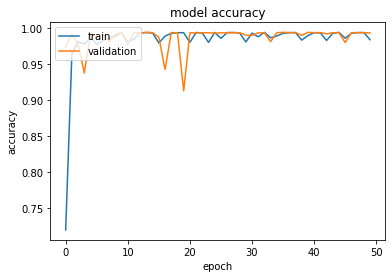

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

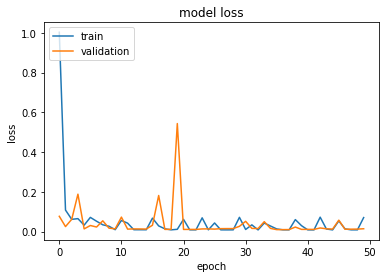

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [27]:
%cd drive/My\ Drive/FruitClassification

/content/drive/My Drive/FruitClassification


In [ ]:
model.save('fruit_classification.h5')